# Plotting orbits (finally!)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
# a sun
mass_of_star = 1.0 # Msun

In [18]:
rp = 1.0 # AU
vp = 35.0 # km/s

In [19]:
MassOfSun = 2e33 # g
MassOfJupiter = 1.898e30 # g
AUinCM = 1.496e13 # AU in CM
kmincm = 1e5 # cm/km
G = 6.674e-8 # gravitational const in cm^3 g^-1 s^-2

In [20]:
mass_of_star = mass_of_star*MassOfSun
vp = vp*kmincm
rp = rp*AUinCM

Let's first plot an analytical solution

In [21]:
ecc = rp*vp*vp/(G*mass_of_star)-1.0 # eccentricity
a = rp/(1.0-ecc) # semi-major axis

print('Eccentricity = ' + str(ecc))
Porb = np.sqrt(4.0*np.pi**2.0*a**3.0/(G*mass_of_star))
print('Orbital period = ' + str(Porb) + ' sec')
print('Orbital period = ' + str(Porb/3.15e7) + ' years')

Eccentricity = 0.37293976625711744
Orbital period = 63373146.36904171 sec
Orbital period = 2.0118459164775144 years


A check for bound orbits:

In [22]:
if ecc < 0:
    print('ecc is less than zero we should stop!')
elif (ecc >=1):
    print('ecc is > 1, probably shouldnt go on!')
else:
    print('all ok! go on!')

all ok! go on!


### Exercise
Plot $r(\theta)$ using this information.

Recall:
$r(\theta) = \frac{a(1-e^2)}{1+ecos(\theta)}$

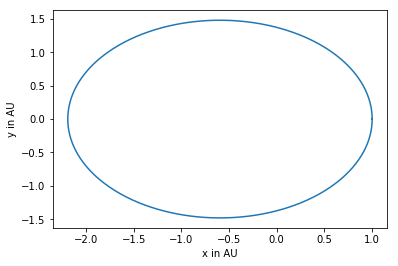

In [30]:
theta = np.linspace(0, 2*np.pi, 500)
theta

r = a*(1-ecc**2)/(1+ecc*np.cos(theta))
r/AUinCM

x = r*np.cos(theta)
y = r*np.sin(theta)

plt.plot(x/AUinCM,y/AUinCM)
plt.xlabel('x in AU')
plt.ylabel('y in AU')
plt.show()

Function to calculate acceleration:

In [53]:
# mStar is in g, rStar is a 2D vector representing 
#  distance from planet to star with (x,y) componets (in cm)
def calcAcc(mStar, rStar):
    # mag(r) = sqrt( r_x^2 + r_y^2 )
    mag_r = (rStar[0]**2 + rStar[1]**2)**0.5
    #print('mag_r ', mag_r)
    # acc due to gravity: a = -G*M/mag_r^2
    mag_a = -G*mStar/mag_r**2
    # direction: is planet is being pulled back toward sun
    unitVector = rStar/mag_r
    acc = mag_a*unitVector
    #print(acc)
    return(acc)

In [54]:
radius_to_star = 5.0*AUinCM
print('radius to star outside of function = ', radius_to_star)

acc = calcAcc(mass_of_star, np.array([radius_to_star,0]))
print(acc)


radius to star outside of function =  74800000000000.0
[-0.02385684 -0.        ]


In [51]:
np.array([5,6])/4.0

array([1.25, 1.5 ])

Our initial conditions:

In [55]:
r_0 = np.array([rp, 0])
v_0 = np.array([0, vp])

How big will our timestep be? $\Delta t$

In [78]:
delta_t = 1e5 # sec, for no reason at all
n_step = 5000 # number of steps for our whole simulation, again for no reason

In [79]:
#r = np.array([]) # WRONG!!!

r = []
ri = r_0 # initial starting radius
vi = v_0 # initial starting velocity
for i in range(n_step): # for 50 steps
    # first we have to calculate the acceleration of gravity at a particular postion
    ag = calcAcc(mass_of_star, ri)
    # we'll update our velocity based on this acceleration
    vip1 = vi + ag*delta_t
    # update our position from our new or old velocity
    rip1 = ri + vi*delta_t
    # bookeeping
    # 1. save our new radius
    #r = np.append(r, rip1) # WRONG!!
    r.append(rip1)
    # 2. make sure we update our "initial" conditions for the next loop
    ri = rip1
    vi = vip1
    
r = np.array(r)
#r

Plot and compare to analytical solutions.

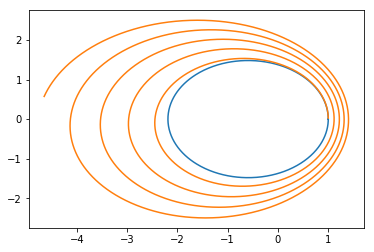

In [80]:
plt.plot(x/AUinCM,y/AUinCM)
plt.plot(r[:,0]/AUinCM, r[:,1]/AUinCM)
plt.show()

# Full 2-body motion

In [152]:
# mStar is in g, rStar is a 2D vector representing 
#  distance from planet to star with (x,y) componets (in cm)
def calcAcc(m2, r1, r2):
    # mag(r) = sqrt( r_x^2 + r_y^2 )
    mag_r = ((r1[0]-r2[0])**2 + (r1[1]-r2[1])**2)**0.5
    #print(mag_r)
    # acc due to gravity: a = -G*M/mag_r^2
    mag_a = -G*m2/mag_r**2
    # direction: is planet is being pulled back toward sun
    unitVector = (r1-r2)/mag_r
    acc = mag_a*unitVector
    return(acc)

In [153]:
# initial conditions
mass_of_particle1 = 0.0009 # Mass of jupiter in Msun
#mass_of_particle1 = 1.0 # Msun
rp = 1.0 # AU
vp = 35.0 # km/s

mass_of_particle1 = mass_of_particle1*MassOfSun
vp = vp*kmincm
rp = rp*AUinCM

rp, vp

(14960000000000.0, 3500000.0)

In [154]:
mass_of_particle2 = 1.0 # Msun 
#mass_of_particle2 = 0.0009 # Msun = Mass jupiter
mass_of_particle2 = mass_of_particle2*MassOfSun

In [155]:
r_0 = np.array([[rp, 0], [0,0]])
v_0 = np.array([[0, vp], [0,0]])

v_0

array([[      0., 3500000.],
       [      0.,       0.]])

In [156]:
r = []
ri = r_0 # initial starting radius
vi = v_0 # initial starting velocity
for i in range(n_step): # for 50 steps
    # first we have to calculate the acceleration of gravity at a particular postion
    ag_particle1 = calcAcc(mass_of_particle2, ri[0,:], ri[1,:])
    ag_particle2 = calcAcc(mass_of_particle1, ri[1,:], ri[0,:])
    #print(ag_particle1)
    # format the acceleration vector to make our lives a bit easier
    ag = np.array([ag_particle1, ag_particle2])
    # we'll update our velocity based on this acceleration
    vip1 = vi + ag*delta_t
    # update our position from our new or old velocity
    rip1 = ri + vi*delta_t
    # bookeeping
    # 1. save our new radius
    #r = np.append(r, rip1) # WRONG!!
    r.append(rip1)
    # 2. make sure we update our "initial" conditions for the next loop
    ri = rip1
    vi = vip1
    
r = np.array(r)
r.shape, delta_t

((5000, 2, 2), 100000.0)

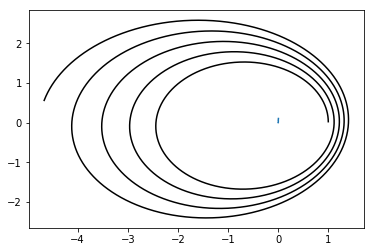

array([ 1.49600000e+13,  1.49540358e+13,  1.49421123e+13, ...,
       -6.97757613e+13, -6.98040971e+13, -6.98321635e+13])

In [159]:
plt.plot(r[:,0,0]/AUinCM, r[:,0,1]/AUinCM, color='black')
plt.plot(r[:,1,0]/AUinCM, r[:,1,1]/AUinCM)
plt.show()
r[:,0,0]

In [128]:
# for 2 bodies:

# energy
# I'll write this a little fancy
def calcE(m1, m2, r1, r2, v1, v2):
    mag_r = np.sqrt( (r1-r2).dot(r1-r2) )
    return 0.5*(m1*v1.dot(v1) + m2*v2.dot(v2)) - G*m1*m2/mag_r

# angular momentum
def calcL(m1, m2, r1, r2, v1, v2):
    L = m1*np.cross(r1,v1) + m2*np.cross(r2,v2)
    #mag_L = np.sqrt( L.dot(L) )
    # for 2 dimensions
    mag_L = np.sqrt(L*L)
    return mag_L

In [129]:
r = [] # position vector
E = [] # to save energy value
L = [] # angular momentum
t = [] # time
ri = r_0 # initial starting radius
vi = v_0 # initial starting velocity
for i in range(n_step): # for 50 steps
    # first we have to calculate the acceleration of gravity at a particular postion
    ag_particle1 = calcAcc(mass_of_particle2, ri[0,:], ri[1,:])
    ag_particle2 = calcAcc(mass_of_particle1, ri[1,:], ri[0,:])
    # format the acceleration vector to make our lives a bit easier
    ag = np.array([ag_particle1, ag_particle2])
    # we'll update our velocity based on this acceleration
    vip1 = vi + ag*delta_t
    # update our position from our new or old velocity
    rip1 = ri + vi*delta_t
    # bookeeping
    # 1. save our new radius
    #r = np.append(r, rip1) # WRONG!!
    r.append(rip1)
    # lets also save time
    t.append(i*delta_t)
    # lets save our energy as well
    Eupdated = calcE(mass_of_particle1, 
                     mass_of_particle2, 
                     ri[0,:], ri[1,:], 
                     vi[0,:], vi[1,:])
    E.append(Eupdated)
    # 2. make sure we update our "initial" conditions for the next loop
    ri = rip1
    vi = vip1
    
r = np.array(r)
E = np.array(E)
E


array([-5.03542781e+42, -5.02782985e+42, -5.02024021e+42, ...,
       -2.57152146e+42, -2.57151198e+42, -2.57150250e+42])

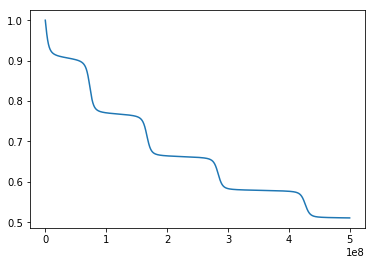

In [131]:
plt.plot(t, E/E[0])

Making a fancy figure!

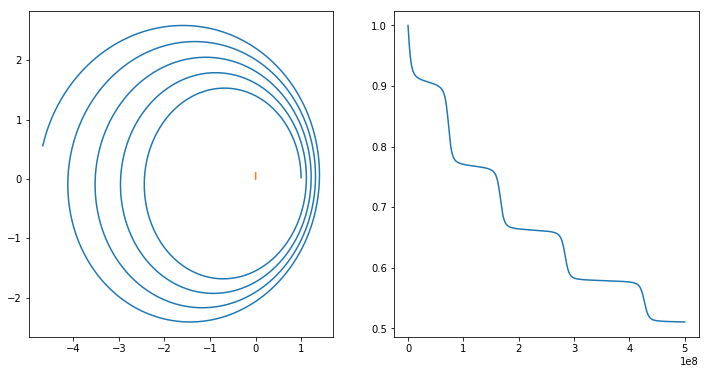

In [135]:
fig, ax = plt.subplots(1, 2, figsize=(6*2,6))

ax[0].plot(r[:,0,0]/AUinCM, r[:,0,1]/AUinCM)
ax[0].plot(r[:,1,0]/AUinCM, r[:,1,1]/AUinCM)

ax[1].plot(t, E/E[0])

plt.show()

In [162]:
n_step, delta_t/1e4

(5000, 10.0)